## Final Project Submission

## Business Understanding

>As our company prepares to enter the aviation industry, making informed decisions about aircraft selection is critical to ensuring both operational safety and customer confidence. Aviation, while an essential mode of transport, inherently carries safety risks that can have severe human and financial impacts. Selecting aircraft models with strong safety records can significantly reduce these risks and establish our brand as a trusted player in both commercial and private aviation markets.

>This project aims to analyze historical aviation accident data to identify the safest aircraft models suitable for our operations. By examining patterns related to accident frequency, injury severity, aircraft damage, and other relevant factors, we seek to uncover actionable insights. The goal is to build a data-driven recommendation for aircraft models that demonstrate exceptional safety performance over time.

>**Key objectives include:**
- **Assessing accident trends** across different aircraft makes and models.
- **Evaluating injury severity and aircraft damage** associated with each model.
- **Identifying patterns** in weather conditions, flight phases, and purposes of flight that correlate with incidents.
- **Recommending aircraft models** with consistently low risk profiles for both commercial and private use.

>**By leveraging this analysis, our company will be better positioned to make strategic fleet investments, prioritize passenger and crew safety, and build a reputation grounded in reliability and trustworthiness in the aviation sector.**

---

## Data Understanding

To support our goal of identifying the safest aircraft models, we are leveraging a comprehensive dataset sourced from the [National Transportation Safety Board (NTSB) Aviation Accident Database](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses). This dataset contains detailed records of past aviation incidents, offering valuable insights into various factors that contribute to aircraft safety performance.

The dataset includes over 90,000 entries, each representing an individual accident report. The key variables captured include:

- **Aircraft Information**  
  - *Make*: Manufacturer of the aircraft.  
  - *Model*: Specific aircraft model.  
  - *Aircraft Damage*: Extent of damage sustained during the incident.  
  - *Number of Engines*, *Engine Type*: Technical specifications influencing aircraft performance and reliability.  
  - *Amateur Built*: Indicates if the aircraft was built by an amateur or certified manufacturer.

- **Flight Information**  
  - *Purpose of Flight*: Categorizes the reason for the flight (e.g., personal, commercial).  
  - *Schedule*: Whether the flight was scheduled or non-scheduled.  
  - *Broad Phase of Flight*: Indicates the flight phase during which the accident occurred.

- **Safety Outcomes**  
  - *Total Fatal Injuries*: Number of fatalities per incident.  
  - *Total Serious/Minor Injuries*, *Total Uninjured*: Breakdown of injury severity outcomes.  
  - *Injury Severity*: Overall categorization of injury impact.

- **Environmental Conditions**  
  - *Weather Condition*: Weather status at the time of the accident.  
  - *Location*, *Country*, *Latitude*, *Longitude*: Geographic data for regional analysis.

- **Investigation Details**  
  - *Investigation Type*: Nature of the investigation (e.g., accident, incident).  
  - *Report Status*: Current status of the accident report.  
  - *Event Date*, *Publication Date*: Timeline details of the incident and reporting.

Initial data exploration has confirmed the dataset’s richness and relevance for our analysis. I’ve identified critical columns with complete data, ensuring our insights are based on reliable information. Before proceeding to detailed analysis, we will perform necessary data cleaning and preprocessing steps to handle missing values, standardize formats, and prepare the data for meaningful exploration.

Understanding the variables and their interrelationships will guide us in building visualizations, statistical summaries, and predictive insights, ultimately leading to well-informed aircraft recommendations.

----


#### **2.1. Import Relevant Libraries**

> These libraries are essential for data manipulation, exploration, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


#### **2.2. Load Data**

> Loading the aviation dataset  ,encoding is specified to avoid issues with special characters.

In [2]:
# Define the file path for the aviation data CSV file
aviation_data_path = 'data/Aviation_Data.csv'

# Load the aviation data into a pandas DataFrame
# 'latin-1' encoding is specified to handle special characters that might cause errors with the default encoding
df = pd.read_csv(aviation_data_path, encoding='latin-1')


/tmp/ipykernel_2896/2775859927.py:6: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(aviation_data_path, encoding='latin-1')


> Create a copy of the original DataFrame, for safe manipulation and analysis without altering the original dataset

In [3]:
# Create a copy of the original DataFrame to preserve the raw data

aviation_df = df.copy()

#### **2.3. Preview the Data**
> Quickly inspecting the structure and contents of the dataset

In [4]:
# Print a message to indicate the output that follows
print("First few rows of Aviation Data Frame:")

# Display the first five rows of the aviation DataFrame
display(aviation_df.head())

First few rows of Aviation Data Frame:


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1.0,Reciprocating,NaN,NaN,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


> Checking the end of the dataset to spot any anomalies or incomplete rows.

In [5]:
# Display the last five rows of the aviation DataFrame
aviation_df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,091,NaN,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N9026P,PIPER,PA-24-260,No,NaN,NaN,091,NaN,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


> I will next Display a concise summary of the DataFrame to identifying missing data and understanding the structure of the dataset.

In [6]:
# Info summary: data types, non-null counts
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

- The dataset contains **90,348 rows** and **31 columns**.
- Most columns are of type `object`, with only 5 numerical (`float64`) columns.
- A significant number of **missing values** is present in many fields, especially:
  - `Latitude`, `Longitude`, `Aircraft.Category`, `FAR.Description`, `Schedule`, `Air.carrier`, `Broad.phase.of.flight`
- Some columns such as `Event.Date` and `Publication.Date` are still stored as **object** types and may need conversion to `datetime` for temporal analysis.
- Column names contain **dots (.)** 

#### **2.4. Check for Missing Values**
Understand the completeness of the dataset and identify columns that require attention.

In [7]:
# Calculate the total number of rows in the DataFrame
# This will be used to compare against non-null counts to identify missing values
total_rows = len(aviation_df)

In [8]:
# Identify columns that have no missing values (i.e., number of non-null entries equals total rows)
no_missing_cols = aviation_df.columns[aviation_df.notnull().sum() == total_rows]

In [9]:
# Print the number of columns with complete data and their names
print(f"Columns with no missing values ({len(no_missing_cols)}):")
print(no_missing_cols.tolist())

Columns with no missing values (1):
['Investigation.Type']


Only One column has no missing value `Investigation.Type`

> **Identify columns that contain missing values**

In [10]:
# Compute the total number of missing (null) values for each column
missing_summary = aviation_df.isnull().sum()

# Filter to only include columns where the number of missing values is greater than zero
missing_summary = missing_summary[missing_summary > 0]

# Print a summary showing how many values are missing in each affected column
print("Missing values per column:")
print(missing_summary)



Missing values per column:
Event.Id                   1459
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40216
Airport.Name              37644
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2841
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8555
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7843
Publication.Date          16689
dtype: int64


#### **2.5. Summary Statistics**

> Check basic statistics for numeric and categorical data to understand distribution and outliers.

> **Summary statistics for categorical (object-type) columns**

- Useful for understanding distributions and spotting potential data quality issues in categorical fields

In [11]:
# Display summary statistics for categorical (object-type) columns
display(aviation_df.describe(include='object'))


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,Aircraft.Category,Registration.Number,Make,Model,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,90348,88889,88889,88837,88663,34382,34373,50132,52704,87889,85695,32287,87507,88826,88797,88787,81793,32023,12582,82697,16648,84397,61724,82505,73659
unique,87951,71,88863,14782,27758,219,25592,27156,10374,24870,109,4,15,79104,8237,12318,2,12,31,3,26,13590,4,12,17006,2923
top,20001214X45071,Accident,WPR23LA045,1982-05-16,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,Non-Fatal,Substantial,Airplane,NONE,Cessna,152,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,67357,64148,27617,344,22227,2367,80312,69530,18221,4474,49448,258,77303,15428,61754,16317


- **Event IDs** and **Accident Numbers** are mostly unique with some repetition (mostly 2-3 occurrences).
- The **Investigation Type** mostly contains the category "Accident."
- **Location**, **Country**, and **Airport** data shows a mix of common entries, with many "NONE" values for fields like **Airport.Code** and **Registration.Number**.
- The **Aircraft.damage** field is dominated by "Substantial" damage.
- **Injury Severity** and **Purpose of Flight** are heavily skewed toward non-fatal outcomes and personal use.
- **Engine Type**, **Aircraft Category**, and **Weather Condition** show a variety of unique values, with "Reciprocating" engines and "Airplane" as the most common categories.



> **Summary statistics for numerical columns**

- Helpful for understanding the range, central tendency, and distribution of numeric data

In [12]:
# Display summary statistics for numerical columns in the DataFrame
display(aviation_df.describe())


,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


- Most incidents have low values for injuries (fatal, serious, or minor), and the majority of incidents have no fatalities or injuries.
- The dataset contains outliers, such as a large number of fatalities or uninjured individuals in rare incidents, which may require further investigation or cleaning.

- The majority of the incidents in the dataset involve **single-engine aircraft**, however, there are incidents involving larger, multi-engine aircraft.


#### **2.6. Explore Key Categorical Columns**

Look into value distributions, unique values, and missing values for important features.

In [13]:
# List of columns to explore, focusing on key categorical and numerical fields
# These columns are likely to offer valuable insights into aviation incidents/accidents
cols_to_explore = [
    'Event.Date','Investigation.Type','Aircraft.damage',  'Make', 'Model', 'Amateur.Built',
    'Engine.Type', 'Purpose.of.flight', 'Air.carrier', 'Weather.Condition', 
    'Broad.phase.of.flight', 'Report.Status','Latitude','Longitude'
]

# Loop through each column in the list and explore its unique values, value counts, and missing data
for col in cols_to_explore:
    print(f"\n--- {col} ---")  # Print the column name to show which column is being explored
    
    # Print unique values (excluding NaNs) to understand the distinct categories or values in the column
    print("Unique values:", aviation_df[col].dropna().unique())
    
    # Print value counts for each unique value, including NaNs to identify missing data patterns
    print("Value counts:\n", aviation_df[col].value_counts(dropna=False))
    
    # Print the number of missing values for the current column to identify potential data cleaning needs
    print("Missing values:", aviation_df[col].isna().sum())




--- Event.Date ---
Unique values: ['1948-10-24' '1962-07-19' '1974-08-30' ... '2022-12-22' '2022-12-26'
 '2022-12-29']
Value counts:
 Event.Date
NaN           1459
1984-06-30      25
1982-05-16      25
2000-07-08      25
1984-08-25      24
              ... 
1992-03-17       1
1992-03-30       1
2022-12-29       1
1948-10-24       1
2022-12-22       1
Name: count, Length: 14783, dtype: int64
Missing values: 1459

--- Investigation.Type ---
Unique values: ['Accident' 'Incident' '25-09-2020' '14-06-2021' '03-11-2020' '24-02-2021'
 '02-02-2021' '05-05-2021' '03-12-2020' '07-12-2020' '06-05-2021'
 '19-11-2020' '04-08-2021' '13-09-2021' '10-06-2021' '14-12-2021'
 '08-06-2021' '24-06-2021' '24-08-2021' '31-03-2021' '27-05-2021'
 '20-05-2021' '18-11-2020' '25-05-2021' '01-06-2021' '15-07-2021'
 '15-10-2021' '26-09-2020' '03-06-2021' '29-09-2021' '28-01-2021'
 '20-10-2021' '11-12-2020' '11-02-2021' '13-12-2021' '06-01-2021'
 '31-08-2021' '04-03-2021' '05-04-2021' '26-01-2021' '29-01-2021'
 '2

- The dates are spread over many decades, but a substantial number of incidents are recorded in more recent years.
- Majority of`Investigation.Type` records are classified as Accident, but the presence of dates suggests that some entries might be incorrectly labeled or formatted.
- Most `Aircraft.damage` incidents resulted in Substantial damage, followed by Destroyed, while a very small number are categorized as Minor or Unknown.
- Cessna and Piper are the most dominant `make`, indicating they are common aircraft brands involved in incidents. However, there are several less common makes with only a single occurrence.
- Certain `models` like 152 and 172 are significantly more frequent than others, highlighting popular aircraft models in the dataset.
- A majority of aircraft involved in incidents are not amateur-built, though a significant portion of incidents involve amateur-built aircraft.
- Most aircraft involved in incidents have reciprocating engines, which are commonly used in smaller, general aviation aircraft. Other types like Turbo Prop and Turbo Fan are less common.
- Personal flights dominate the dataset, followed by instructional flights, suggesting many incidents involve private pilots or flight training.
- A large portion of  data is missing for `Air.carrier`, and Pilot appears as a common entry, likely representing personal or non-commercial operators.
- Most incidents occurred in VMC (visual conditions), which is typical for general aviation incidents, but IMC conditions may indicate more hazardous flight situations.
- A significant portion of incidents occurred during the landing and takeoff phases, which is typical for general aviation accidents. Many records are also missing phase information.
- Probable Cause is the most frequent report status, which is consistent with standard aviation incident reporting. However, missing data may imply incomplete investigations.
- A large portion of the data for geographic locations is missing, which could hinder spatial analysis of incidents.


#### **2.7. Check for Duplicates**
> Identify any redundant entries in the data

In [14]:
# Check for duplicate rows in the DataFrame
print("Duplicate rows:", aviation_df.duplicated().sum())



Duplicate rows: 1390


#### **2.8. A correlation matrix  heatmapfor numerical columns**

> This will help show how numerical columns relate to each other.

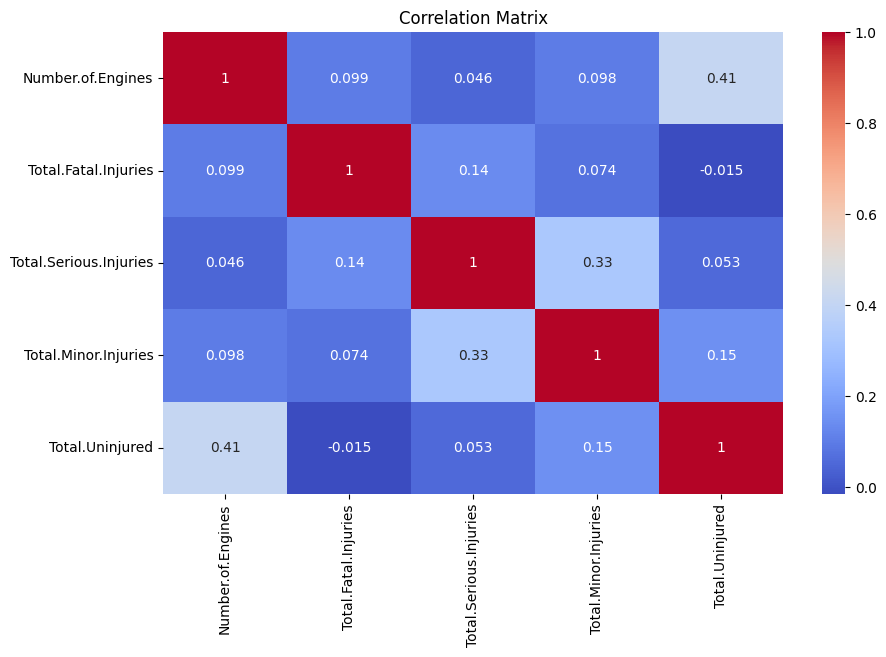

In [15]:
# Set the figure size for the heatmap to ensure the plot is large enough to read
plt.figure(figsize=(10,6))

# Create a heatmap of the correlation matrix for numerical columns
# .corr() computes the correlation matrix, 'numeric_only=True' ensures only numeric columns are included
# annot=True adds the correlation coefficients as annotations on the heatmap
# cmap='coolwarm' defines the color scheme for the heatmap, with warmer colors indicating higher correlations
sns.heatmap(aviation_df.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Set the title of the heatmap for context
plt.title("Correlation Matrix")

# Display the heatmap
plt.show()

The correlation matrix helps identify relationships between variables related to aircraft safety:

- **Number of Engines** shows a **moderate positive correlation (0.41)** with the number of **Uninjured passengers**, suggesting that aircraft with more engines might offer better chances of survival.
- **Serious Injuries** and **Minor Injuries** have a **moderate positive correlation (0.33)**, indicating that accidents with more serious injuries tend to also have more minor injuries.
- **Total Fatal Injuries** has **very weak or no correlation** with other variables, meaning fatality counts are not strongly linked to other injury outcomes or engine count.



#### **2.8. A Box Plot of numerical features to  visualize Outliers**
> Just for vuisualization to see how spread out the outliers are 

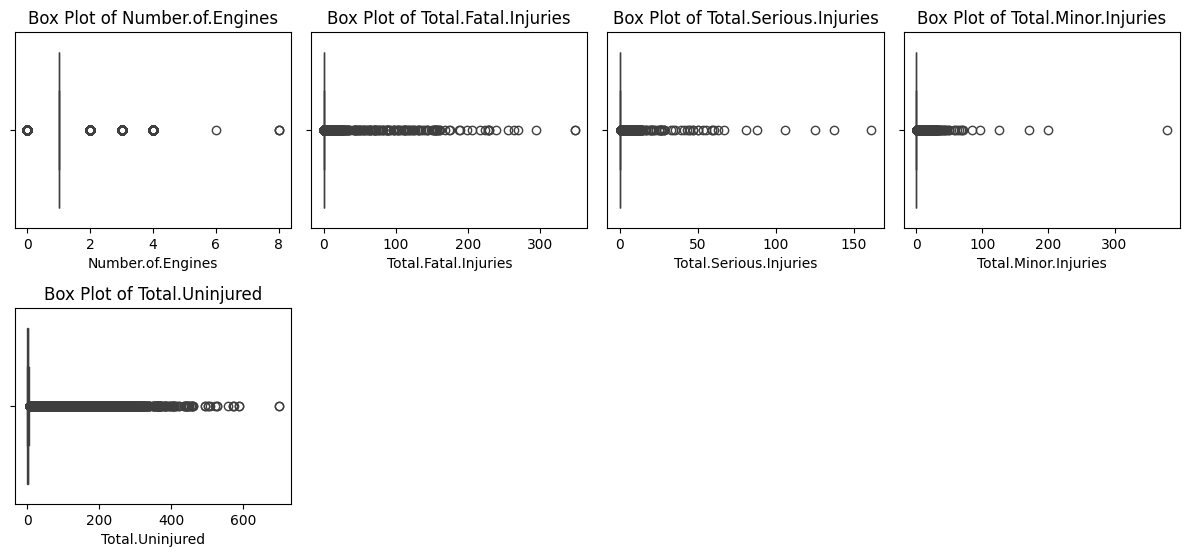

In [16]:
# Set the figure size for the box plots
plt.figure(figsize=(12,8))

# Create box plots for each numerical column in the DataFrame
# This will show potential outliers outside the whiskers of each box plot
for i, col in enumerate(aviation_df.select_dtypes(include='number').columns, 1):
    plt.subplot(3, 4, i)  # Create a grid of subplots (3 rows, 4 columns)
    sns.boxplot(x=aviation_df[col])  # Create a box plot for the current column
    plt.title(f"Box Plot of {col}")  # Set the title of each subplot

# Adjust layout to prevent overlap and ensure readability
plt.tight_layout()

# Show the plot
plt.show()

- All variables (Number of Engines, Injuries, and Uninjured) show a large number of outliers, indicating high variability in incident outcomes.

- Most values are clustered near the lower end, with a few extreme values stretching far beyond the rest.

- This suggests that most accidents involve few injuries, but there are some rare but severe incidents with very high casualties or uninjured counts.

## **3. Data Preparation .**

> To ensure the accuracy and reliability of the analysis, I undertook a structured data preparation process. This step is critical for transforming raw accident records into a clean, analyzable format that supports meaningful insights.


<h3><u>  3.1 Data Cleaning </u></h3>

> **Standardizing Column Names:** 
- This helps to standardize column names by replacing any periods (.) in the column names with underscores (_) and avoid issues when referencing columns in code


In [17]:
# Replace any periods (.) in the column names with underscores (_)
aviation_df.columns = aviation_df.columns.str.replace('.', '_', regex=False)


> **Column Selection**
- Kept only the relevant columns for analysis.

In [18]:
# List of relevant columns to keep for further analysis
# These columns are selected based on their potential importance in investigating aviation incidents/accidents
columns_to_keep = [
    'Investigation_Type',  # Type of investigation conducted
    'Event_Date',  # Date of the event
    'Location',  # Location where the incident occurred
    'Country',  # Country of the event
    'Injury_Severity',  # Severity of injuries (fatal, serious, minor)
    'Aircraft_damage',  # Extent of damage to the aircraft
    'Make',  # Manufacturer of the aircraft
    'Model',  # Model of the aircraft
    'Amateur_Built',  # Whether the aircraft was amateur-built
    'Number_of_Engines',  # Number of engines on the aircraft
    'Engine_Type',  # Type of engine used in the aircraft
    'Purpose_of_flight',  # Purpose for which the flight was undertaken 
    'Total_Fatal_Injuries',  # Total number of fatal injuries
    'Total_Serious_Injuries',  # Total number of serious injuries
    'Total_Minor_Injuries',  # Total number of minor injuries
    'Total_Uninjured',  # Total number of uninjured individuals
    'Weather_Condition',  # Weather condition during the event
    'Broad_phase_of_flight',  # Phase of flight when the event occurred 
    'Report_Status'  # Status of the event report 
]

# Create a new DataFrame with only the selected columns
# The .copy() method ensures that we have an independent copy of the data to avoid changes to the original DataFrame
aviation_df = aviation_df[columns_to_keep].copy()


> **Handling Missing Values:**

 - I carefully examined the dataset for missing or incomplete entries. Critical columns such as *Aircraft Make*, *Model*, *Injury Severity*, *Aircraft Damage*, *Purpose of Flight*, and *Fatal Injuries* were prioritized to maintain the integrity of our analysis. Missing values in essential fields were addressed by either removal or, where appropriate, imputing values based on context.

In [19]:
# Fill missing values in the 'Make' column with the string 'Unknown'
# This helps to handle any missing manufacturer information and avoids errors when analyzing the data
aviation_df['Make'] = aviation_df['Make'].fillna('Unknown')


In [20]:
# Fill missing values in the 'Model' column with the string 'Unknown'
# This ensures that any missing aircraft model information is replaced with a placeholder,
# which helps maintain the integrity of the dataset for analysis and avoids issues during processing
aviation_df['Model'] = aviation_df['Model'].fillna('Unknown')


In [21]:
# Fill missing values in the 'Amateur_Built' column with the string 'UNK'
# This assigns a placeholder value for missing entries, indicating an unknown status for whether the aircraft was amateur-built
aviation_df['Amateur_Built'] = aviation_df['Amateur_Built'].fillna('UNK')


In [22]:
# Fill missing values in the 'Weather_Condition' column with the string 'UNK'
# This placeholder indicates that the weather condition is unknown for those records with missing data
aviation_df['Weather_Condition'] = aviation_df['Weather_Condition'].fillna('UNK')


In [23]:
# Fill missing values in the 'Aircraft_damage' column with the string 'Unknown'
# This ensures that missing damage information is replaced with a consistent placeholder value
# The 'inplace=True' argument modifies the original DataFrame directly without needing to assign it back to the column
aviation_df['Aircraft_damage'] = aviation_df['Aircraft_damage'].fillna('Unknown')

In [24]:
# Fill missing values for 'Purpose_of_flight' with 'Other' (assuming unknown purpose means 'Other')
aviation_df['Purpose_of_flight'] = aviation_df['Purpose_of_flight'].fillna('Other')

In [25]:
# Fill missing values for 'Engine_Type' with 'Unknown' (assuming missing engine type is unknown)
aviation_df['Engine_Type'] = aviation_df['Engine_Type'].fillna('Unknown')

In [26]:
# Fill missing values for 'Report_Status' with 'Unknown' (assuming unknown report status is 'Unknown')
aviation_df['Report_Status'] = aviation_df['Report_Status'].fillna('Unknown')

In [27]:
# Fill missing values in the 'Number_of_Engines' column with 0
# This is a reasonable approach to indicate that the number of engines is unknown or not recorded
# After filling missing values, convert the column to integers using .astype(int) to ensure consistent data type
aviation_df['Number_of_Engines'] = aviation_df['Number_of_Engines'].fillna(0).astype(int)


In [28]:
# Verify that all missing values have been filled
print(aviation_df.isnull().sum())


Investigation_Type            0
Event_Date                 1459
Location                   1511
Country                    1685
Injury_Severity            2459
Aircraft_damage               0
Make                          0
Model                         0
Amateur_Built                 0
Number_of_Engines             0
Engine_Type                   0
Purpose_of_flight             0
Total_Fatal_Injuries      12860
Total_Serious_Injuries    13969
Total_Minor_Injuries      13392
Total_Uninjured            7371
Weather_Condition             0
Broad_phase_of_flight     28624
Report_Status                 0
dtype: int64


> **Cleaning Injury Severity & Extracting Fatalities**

- Injury Severity: This column contains a mixture of text descriptions and embedded numbers (e.g., Fatal(3)). I used regular expressions to extract the number of fatalities and created a temporary column called Fatal_Injuries.

In [29]:
# Extract the number of fatal injuries from the 'Injury_Severity' column using a regular expression
# The regular expression looks for a pattern like 'Fatal(1)', capturing the number of fatal injuries
# If the pattern is found, the number is extracted and converted to an integer
# If the pattern is not found, or if the entry is not a string, the value is set to 0 (indicating no fatal injuries)
aviation_df['Fatal_Injuries'] = aviation_df['Injury_Severity'].apply(
    lambda x: int(re.search(r'Fatal\((\d+)\)', x).group(1)) 
    if isinstance(x, str) and re.search(r'Fatal\((\d+)\)', x) 
    else 0
)


> **Total Fatal Injuries Imputation:** 
- For entries with missing values in the Total_Fatal_Injuries column, I fill them using the extracted values from Fatal_Injuries. 
 - This allows us to retain more rows during analysis.

In [30]:
# Fill missing values in the 'Total_Fatal_Injuries' column with the values from the 'Fatal_Injuries' column
# This ensures that if the 'Total_Fatal_Injuries' is missing, we use the value derived from the 'Fatal_Injuries' column
aviation_df['Total_Fatal_Injuries'] = aviation_df['Total_Fatal_Injuries'].fillna(aviation_df['Fatal_Injuries'])

# Drop the 'Fatal_Injuries' column from the DataFrame, as its values are now incorporated into 'Total_Fatal_Injuries'
aviation_df = aviation_df.drop(columns=['Fatal_Injuries'])

> **Injury Severity Normalization:**

- After extracting and imputing fatality data, I further normalized the Injury_Severity column. Specifically, if an incident had Total_Fatal_Injuries equal to 0, we labeled it as 'Non-Fatal' to simplify classification and analysis of injury outcomes.

In [31]:
# Update the 'Injury_Severity' column to 'Non-Fatal' where there were zero fatalities
aviation_df.loc[aviation_df['Total_Fatal_Injuries'] == 0, 'Injury_Severity'] = 'Non-Fatal'


> **Fill missing values for injury-related columns with 0**
- This ensures that any missing values in the 'Total_Fatal_Injuries', 'Total_Serious_Injuries',
- 'Total_Minor_Injuries', and 'Total_Uninjured' columns are replaced with 0, indicating no injuries or uninjured individuals

In [32]:
# Fill missing values for injury-related columns with 0
injury_cols = [
    'Total_Fatal_Injuries',  # Number of fatal injuries
    'Total_Serious_Injuries',  # Number of serious injuries
    'Total_Minor_Injuries',  # Number of minor injuries
    'Total_Uninjured'  # Number of uninjured individuals
]

# Apply the fill operation to the selected columns
aviation_df[injury_cols] = aviation_df[injury_cols].fillna(0)


#### 2.2. **Data Type Conversions**

> Date field (`Event Date`) is converted to proper datetime formats to facilitate time-based analysis.
   

In [33]:
# Convert the 'Event_Date' column to datetime format
# The 'errors='coerce'' argument ensures that any invalid or improperly formatted dates are set to NaT (Not a Time) instead of raising an error
aviation_df["Event_Date"] = pd.to_datetime(aviation_df["Event_Date"], errors='coerce')


> Numeric fields such as injury counts were ensured to be in integer format for accurate calculations.

In [34]:
# Convert injury-related columns to integer type for cleaner and more consistent data representation
aviation_df[injury_cols] = aviation_df[injury_cols].astype(int)

#### 2.3. **Feature Engineering**


 > **Total Injuries Calculation:**
- Created an aggregated feature, `Total Injuries`, by summing fatal, serious, and minor injuries to provide a comprehensive view of each incident's severity.

In [35]:
# Calculate the total number of injuries by summing the values from the 'Total_Fatal_Injuries',
aviation_df["Total_Injuries"] = aviation_df[["Total_Fatal_Injuries", "Total_Serious_Injuries", "Total_Minor_Injuries"]].sum(axis=1)


#### 2.4 **Filtering Relevant Data**

>  ** Record Filtering** 

- Kept only rows with `Investigation_Type` in ['Accident', 'Incident'].
   

In [36]:
# Filter the DataFrame to keep only rows with valid 'Investigation_Type' values ('Accident' or 'Incident')
aviation_df = aviation_df[aviation_df['Investigation_Type'].isin(['Accident', 'Incident'])]

# Reset the index of the DataFrame after filtering
# The 'drop=True' argument prevents the old index from being added as a column, ensuring a clean reset
aviation_df.reset_index(drop=True, inplace=True)

> **Engine Type Mapping**

- Unified variants of engine names to a common label (Turbo Fan, Turbo Jet, etc.).

- Standardized values to uppercase for consistency.

In [37]:
# Create a mapping dictionary to standardize engine types in the 'Engine_Type' column
# The dictionary maps various representations of engine types to a consistent naming scheme
engine_map = {
    'RECIPROCATING': 'Reciprocating',
    'TURBO FAN': 'Turbo Fan',
    'TURBO SHAFT': 'Turbo Shaft',
    'TURBO PROP': 'Turbo Prop',
    'TURBO JET': 'Turbo Jet',
    'GEARED TURBOFAN': 'Turbo Fan',
    'ELECTRIC': 'Other',
    'HYBRID ROCKET': 'Other',
    'LR': 'Other',
    'NONE': 'None',
    'UNK': 'Unknown',
    'UNKNOWN': 'Unknown',
    'Geared Turbofan': 'Turbo Fan',
    'Electric': 'Other',
    'Hybrid Rocket': 'Other',
    'LR': 'Other',
    'NONE': 'None',
    'UNK': 'Unknown'
}

# Replace the engine types in the 'Engine_Type' column according to the mapping
aviation_df['Engine_Type'] = aviation_df['Engine_Type'].replace(engine_map)

# Print the value counts of the 'Engine_Type' column to verify the replacement
# dropna=False includes missing values in the counts, giving a complete overview
print(aviation_df['Engine_Type'].value_counts(dropna=False))

# Convert all engine type values to uppercase to ensure uniformity and avoid case-related issues
aviation_df['Engine_Type'] = aviation_df['Engine_Type'].str.upper()


Engine_Type
Reciprocating    69530
Unknown           9148
Turbo Shaft       3609
Turbo Prop        3391
Turbo Fan         2493
Turbo Jet          703
Other               13
None                 2
Name: count, dtype: int64


> **Flight Phase Simplification**
- Mapped uncommon Broad_phase_of_flight values to 'Other'.

In [38]:
# Define a list of common flight phases of interest (Landing, Takeoff, Cruise, Maneuvering, Approach)
common_phases = ['Landing', 'Takeoff', 'Cruise', 'Maneuvering', 'Approach']

# Use the apply function to update the 'Broad_phase_of_flight' column
# If the flight phase is in the list of common phases, it is left unchanged
# Otherwise, it is categorized as 'Other' to group less common phases under a single category
aviation_df['Broad_phase_of_flight'] = aviation_df['Broad_phase_of_flight'].apply(
    lambda x: x if x in common_phases else 'Other'
)

# Display the value counts of the 'Broad_phase_of_flight' column to see the distribution of flight phases
aviation_df['Broad_phase_of_flight'].value_counts()


Broad_phase_of_flight
Other          36009
Landing        15428
Takeoff        12493
Cruise         10269
Maneuvering     8144
Approach        6546
Name: count, dtype: int64

> **Weather Condition Standardization**
- Converted to uppercase (VMC, IMC, UNK), ensuring  uniformity and consistency, preventing case-related issues when analyzing or grouping data

In [39]:
# Convert all entries in the 'Weather_Condition' column to uppercase
aviation_df['Weather_Condition'] = aviation_df['Weather_Condition'].str.upper()

# Display the value counts of the 'Weather_Condition' column to see the distribution of weather conditions
aviation_df['Weather_Condition'].value_counts()


Weather_Condition
VMC    77303
IMC     5976
UNK     5610
Name: count, dtype: int64

> **Purpose of Flight Cleanup**

- Lowercased for mapping, replaced noisy/inconsistent values, and re-uppercased for standardization.

In [40]:
# Convert all entries in the 'Purpose_of_flight' column to lowercase
# This ensures that any variations in capitalization are standardized before applying the mapping
aviation_df['Purpose_of_flight'] = aviation_df['Purpose_of_flight'].str.lower()

# Create a mapping dictionary to standardize the 'Purpose_of_flight' values
# This replaces specific non-standard values with more consistent labels for better analysis
replace_map = {
    'air Race Show': 'Air Race/Show',  # Standardizes 'Air Race Show' to 'Air Race/Show'
    'air Race/Show': 'Air Race/Show',  # Keeps 'Air Race/Show' as it is (redundant here)
    'asho': 'Other',                  # Replaces 'Asho' with 'Other'
    'pubs': 'Other',                  # Replaces 'Pubs' with 'Other'
    'publ': 'Other',                  # Replaces 'Publ' with 'Other'
    'unknown': 'Unknown'              # Keeps 'Unknown' as it is (redundant here)
}

# Apply the replacement mapping to standardize the 'Purpose_of_flight' column values
aviation_df['Purpose_of_flight'] = aviation_df['Purpose_of_flight'].replace(replace_map)

# Convert the 'Purpose_of_flight' column back to uppercase to ensure uniformity
aviation_df['Purpose_of_flight'] = aviation_df['Purpose_of_flight'].str.upper()

# Display the value counts of the 'Purpose_of_flight' column to see the distribution of flight purposes
aviation_df['Purpose_of_flight'].value_counts()


Purpose_of_flight
PERSONAL                     49448
INSTRUCTIONAL                10601
UNKNOWN                       6802
OTHER                         6203
AERIAL APPLICATION            4712
BUSINESS                      4018
POSITIONING                   1646
OTHER WORK USE                1264
FERRY                          812
AERIAL OBSERVATION             794
PUBLIC AIRCRAFT                720
EXECUTIVE/CORPORATE            553
FLIGHT TEST                    405
SKYDIVING                      182
EXTERNAL LOAD                  123
PUBLIC AIRCRAFT - FEDERAL      105
BANNER TOW                     101
AIR RACE SHOW                   99
PUBLIC AIRCRAFT - LOCAL         74
PUBLIC AIRCRAFT - STATE         64
AIR RACE/SHOW                   59
GLIDER TOW                      53
FIREFIGHTING                    40
AIR DROP                        11
Name: count, dtype: int64

> **Drop  missing row values**
- This ensures that only rows with both valid country and location data are kept for analysis


In [ ]:
# Drop rows where either 'Country' or 'Location' columns have missing values
aviation_df.dropna(subset=['Country', 'Location'], inplace=True)

Lets check data information to confim if we still have null zalues

In [42]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88612 entries, 0 to 88888
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation_Type      88612 non-null  object        
 1   Event_Date              88612 non-null  datetime64[ns]
 2   Location                88612 non-null  object        
 3   Country                 88612 non-null  object        
 4   Injury_Severity         88612 non-null  object        
 5   Aircraft_damage         88612 non-null  object        
 6   Make                    88612 non-null  object        
 7   Model                   88612 non-null  object        
 8   Amateur_Built           88612 non-null  object        
 9   Number_of_Engines       88612 non-null  int64         
 10  Engine_Type             88612 non-null  object        
 11  Purpose_of_flight       88612 non-null  object        
 12  Total_Fatal_Injuries    88612 non-null  int64      

In [44]:
# Re-encode the 'Report_Status' column to 'latin1' and then decode it back to 'utf-8'
# This ensures that any non-UTF-8 characters in the 'Report_Status' column are properly handled
# The 'errors="ignore"' argument ensures that any problematic characters that can't be decoded are ignored
aviation_df['Report_Status'] = aviation_df['Report_Status'].str.encode('latin1').str.decode('utf-8', errors='ignore')


In [ ]:
# Remove duplicate rows from the DataFrame to ensure each record is unique
# The 'inplace=True' argument modifies the original DataFrame, removing duplicates directly
aviation_df.drop_duplicates(inplace=True)

# Print the number of duplicate rows remaining (should be 0 after removing duplicates)
# The 'duplicated().sum()' function counts how many rows are duplicated
print("Duplicate rows:", aviation_df.duplicated().sum())


In [ ]:
# Convert all entries in the 'Make' column to title case (e.g., 'boeing' becomes 'Boeing')
# This ensures uniformity in capitalization, making the 'Make' column more consistent
aviation_df['Make'] = aviation_df['Make'].str.title()

# Count the occurrences of each unique value in the 'Make' column
make_counts = aviation_df['Make'].value_counts()

# Identify makes with 10 or more occurrences
# This step filters out less common makes, focusing on those that appear frequently enough to be considered significant
common_makes = make_counts[make_counts >= 10].index

In [ ]:
# Convert all entries in the 'Model' column to uppercase and remove leading/trailing whitespace
# This standardizes the 'Model' column by ensuring consistent capitalization and eliminating extra spaces
aviation_df['Model'] = aviation_df['Model'].str.upper().str.strip()

# Count the occurrences of each unique value in the 'Model' column
model_counts = aviation_df['Model'].value_counts()

# Identify models with 10 or more occurrences
# This step filters out less common models, focusing on those that appear frequently enough to be considered significant
common_models = model_counts[model_counts >= 10].index  # threshold can be adjusted


Savethe file to csv 

In [43]:
# Save the cleaned DataFrame to a new CSV file
aviation_df.to_csv('aviation_data_clean.csv', index=False)

# Notify that the data has been successfully saved
print("DataFrame has been saved as 'aviation_data_clean.csv' ready for Tableau")

DataFrame has been saved as 'aviation_data_clean.csv' ready for Tableau
